In [95]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.special import boxcox1p
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
sns.set_style('darkgrid') #seaborn


In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.head(5)


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
#train['allarea'] = train['1stFlrSF']+train['2ndFlrSF']+train['BsmtFinSF1']
#test['allarea'] = test['1stFlrSF']+test['2ndFlrSF']+test['BsmtFinSF1']
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Data Processing

### Outliers (deleting probably wrong data)

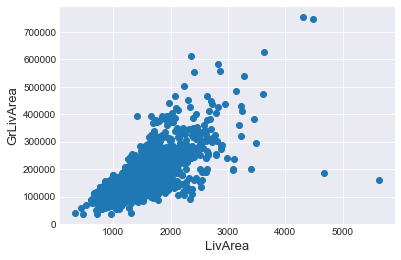

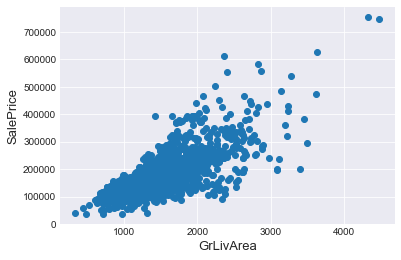

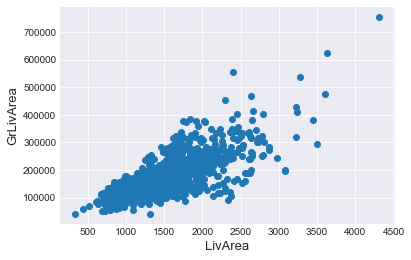

In [98]:
fig, ax = plt.subplots()

ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()

#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#only_normal sale condition
def normal_sale(df): #for possibility to change it
    return df.loc[(df['SaleCondition'] == "Normal")]



#train_norm=train.loc[(train['SaleCondition'] == "Normal")]
train_norm = normal_sale(train)
fig, ax = plt.subplots()

ax.scatter(x = train_norm['GrLivArea'], y = train_norm['SalePrice'])
plt.ylabel('GrLivArea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()

## Target Variable

### SalePrice is the variable we need to predict. So let's do some analysis on this variable first



 mu = 180932.92 and sigma = 79467.79



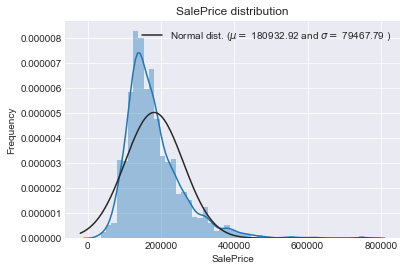

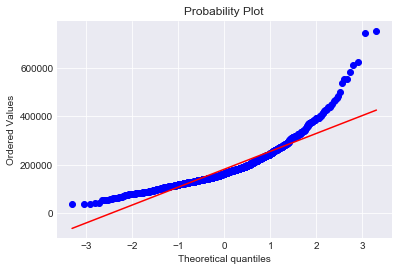

In [99]:
sns.distplot(train['SalePrice'] , fit=norm); #visualisation package

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### The same for normal sale condition



 mu = 175202.22 and sigma = 69684.53



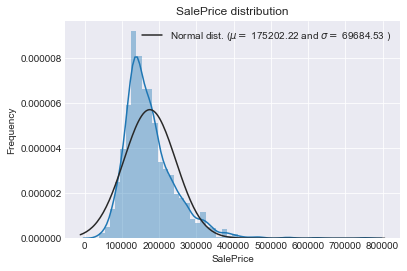

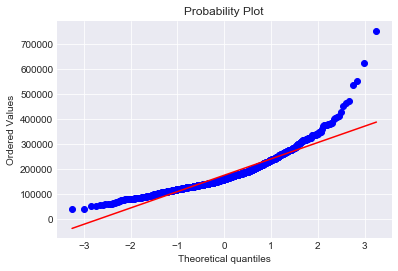

In [100]:
sns.distplot(train_norm['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_norm['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_norm['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

### Log-transformation of the target variable




 mu = 12.02 and sigma = 0.40



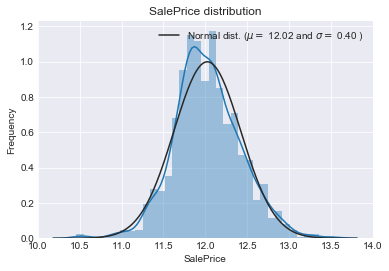

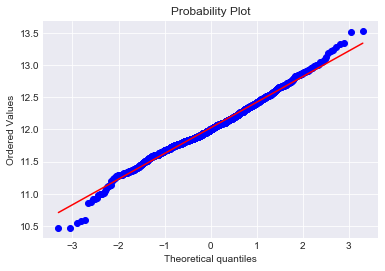

In [101]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"]) # --> ln(1+x) --> well known method for right skewed

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### The same for normal sale condition


 mu = 12.01 and sigma = 0.37



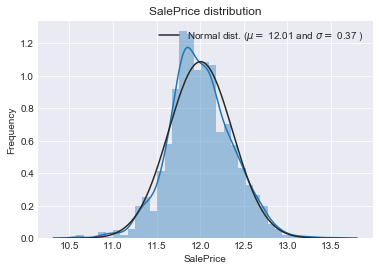

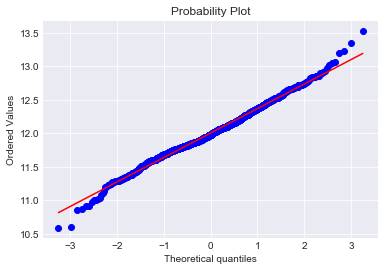

In [102]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_norm["SalePrice"] = np.log1p(train_norm["SalePrice"])

#Check the new distribution 
sns.distplot(train_norm['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_norm['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_norm['SalePrice'], plot=plt)
plt.show()

### Features engineering
let's first concatenate the train and test data in the same dataframe

In [103]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


#### Missing Data

In [104]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


#### The same for normal sale condition

In [105]:
all_data_norm = normal_sale(pd.concat((train, test)).reset_index(drop=True))
all_data_norm.drop(['SalePrice'], axis=1, inplace=True)
print("all_data_norm size is : {}".format(all_data_norm.shape))
all_data_norm_na = (all_data_norm.isnull().sum() / len(all_data_norm)) * 100
all_data_norm_na = all_data_norm_na.drop(all_data_norm_na[all_data_norm_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_norm_na})
missing_data.head(20)

all_data_norm size is : (2402, 79)


,Missing Ratio
PoolQC,99.750
MiscFeature,96.003
Alley,93.589
Fence,79.142
FireplaceQu,48.376
LotFrontage,18.609
GarageYrBlt,4.871
GarageFinish,4.871
GarageQual,4.871
GarageCond,4.871


Text(0.5,1,'Percent missing data by feature')

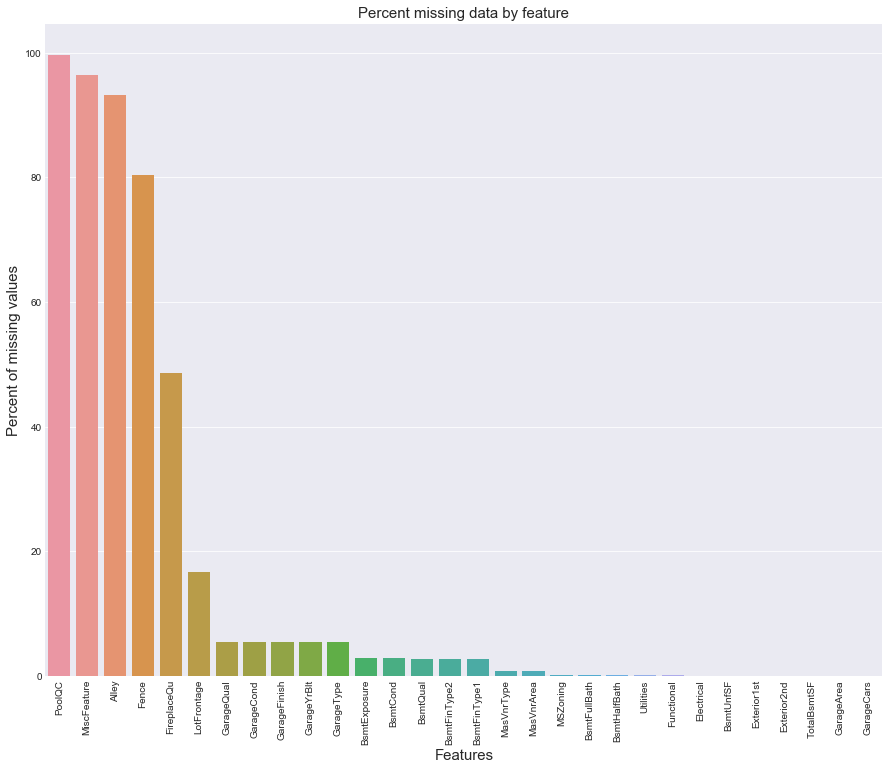

In [106]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


MSSubClass      -0.074
LotFrontage      0.373
LotArea          0.261
OverallQual      0.821
OverallCond     -0.037
YearBuilt        0.587
YearRemodAdd     0.566
MasVnrArea       0.435
BsmtFinSF1       0.392
BsmtFinSF2       0.005
BsmtUnfSF        0.222
TotalBsmtSF      0.648
1stFlrSF         0.621
2ndFlrSF         0.320
LowQualFinSF    -0.038
GrLivArea        0.725
BsmtFullBath     0.237
BsmtHalfBath    -0.005
FullBath         0.596
HalfBath         0.314
BedroomAbvGr     0.209
KitchenAbvGr    -0.148
TotRmsAbvGrd     0.538
Fireplaces       0.492
GarageYrBlt      0.542
GarageCars       0.681
GarageArea       0.656
WoodDeckSF       0.334
OpenPorchSF      0.325
EnclosedPorch   -0.149
3SsnPorch        0.055
ScreenPorch      0.121
PoolArea         0.074
MiscVal         -0.020
MoSold           0.057
YrSold          -0.037
SalePrice        1.000
Name: SalePrice, dtype: float64


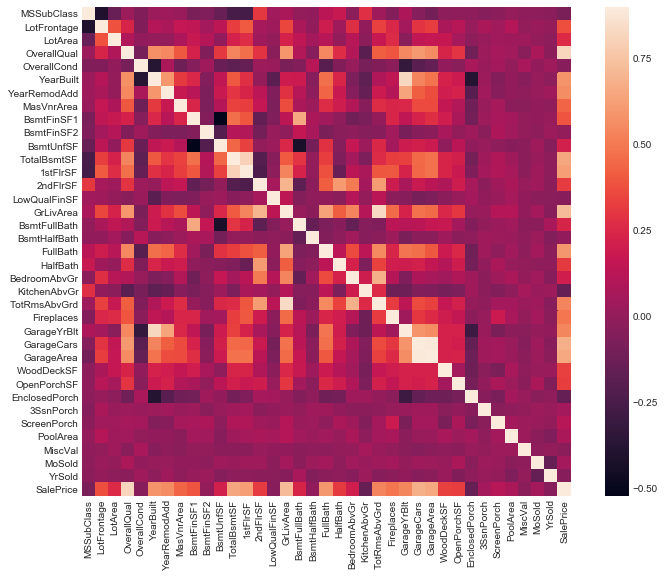

In [107]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
print (corrmat['SalePrice'])

#### normal:

MSSubClass      -0.067
LotFrontage      0.352
LotArea          0.274
OverallQual      0.808
OverallCond     -0.014
YearBuilt        0.552
YearRemodAdd     0.525
MasVnrArea       0.410
BsmtFinSF1       0.393
BsmtFinSF2       0.025
BsmtUnfSF        0.210
TotalBsmtSF      0.627
1stFlrSF         0.601
2ndFlrSF         0.353
LowQualFinSF    -0.031
GrLivArea        0.733
BsmtFullBath     0.239
BsmtHalfBath     0.005
FullBath         0.586
HalfBath         0.331
BedroomAbvGr     0.254
KitchenAbvGr    -0.161
TotRmsAbvGrd     0.535
Fireplaces       0.493
GarageYrBlt      0.501
GarageCars       0.663
GarageArea       0.635
WoodDeckSF       0.349
OpenPorchSF      0.338
EnclosedPorch   -0.146
3SsnPorch        0.043
ScreenPorch      0.130
PoolArea         0.024
MiscVal         -0.016
MoSold           0.026
YrSold           0.004
SalePrice        1.000
Name: SalePrice, dtype: float64


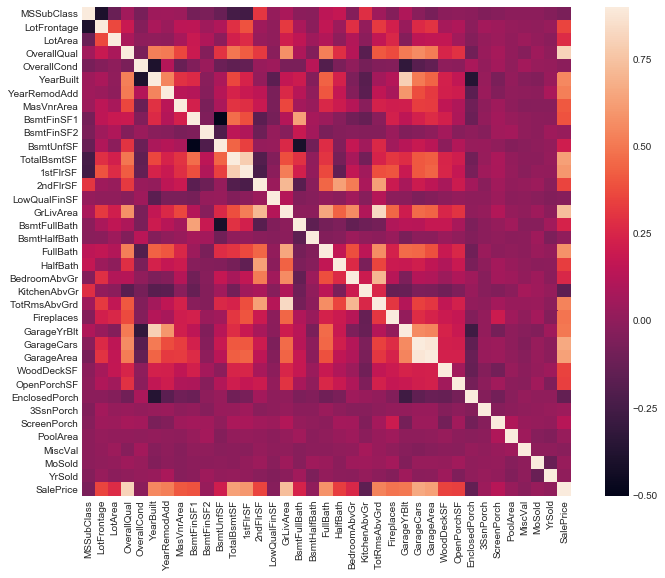

In [108]:
#Correlation map to see how features are correlated with SalePrice
corrmat = normal_sale(train).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
print (corrmat['SalePrice'])

In [109]:

#it imputes columns NA on xyz
def fill_xyz(df, xyz, columns):
    for column in columns:
        df[column] = df[column].fillna(xyz)
    return df

#it imputes columns NA on their most frequently value
def fill_median(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

fill_xyz(all_data, "None", ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 'GarageType', 'GarageFinish',
                  'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', "MasVnrType",'MSSubClass'])
fill_xyz(all_data_norm, "None", ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 'GarageType', 'GarageFinish',
                  'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', "MasVnrType",'MSSubClass'])
fill_xyz(all_data, 0,['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                      'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'])
fill_xyz(all_data_norm, 0,['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                      'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'])
fill_median(all_data, ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'])
fill_median(all_data_norm, ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'])
fill_xyz(all_data, "Typ",["Functional"])
fill_xyz(all_data_norm, "Typ",["Functional"])
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data_norm["LotFrontage"] = all_data_norm.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
all_data_norm = all_data_norm.drop(['Utilities'], axis=1)
all_data['allarea'] = all_data['1stFlrSF']+all_data['2ndFlrSF']+all_data['BsmtFinSF1']
all_data_norm['allarea'] = all_data_norm['1stFlrSF']+all_data_norm['2ndFlrSF']+all_data_norm['BsmtFinSF1']
all_data_norm.head(25)
print(all_data.shape)
print(all_data_norm.shape)
#all_data_norm['OverallCond'].head(25)

(2917, 79)
(2402, 79)


In [110]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [111]:
#Check remaining missing values if any 
all_data_norm_na = (all_data_norm.isnull().sum() / len(all_data_norm)) * 100
all_data_norm_na = all_data_norm_na.drop(all_data_norm_na[all_data_norm_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_norm_na})
missing_data.head(20)

,Missing Ratio


#### More features engeneering¶
Transforming some numerical variables that are really categorical

In [112]:

#it replaces num on str in given columns
def transform_num(df, columns):
    for col in columns:
        df[col] = df[col].apply(str)
        
# 'OverallCond', 'YrSold', 'MoSold' are questionable       
transform_num(all_data,['MSSubClass', 'OverallCond', 'YrSold', 'MoSold'])        
transform_num(all_data_norm,['MSSubClass', 'OverallCond', 'YrSold', 'MoSold'])  


In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. 
I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes.
PCA finds the linear overlap, so will naturally tend to group similar features into the same feature
Principal component analysis (PCA)

In [113]:
#it encodes categorical data into num:
#      col    col
# 0    aaa    1
# 1    bbb  ->2
# 2    ccc    3
# 3    aaa    1  
def encode(df, columns, copy=False):
    if copy:
        df2 = df.copy()
    else:
        df2 = df    
    for c in columns:
            lbl = LabelEncoder() 
            lbl.fit(list(df2[c].values)) 
            df2[c] = lbl.transform(list(df2[c].values))
    return df2
    
#it encodes categorical data into:
#      col    aaa  bbb ccc
# 0    aaa    1     0   0 
# 1    bbb  ->0     1   0
# 2    ccc    0     0   1
# 3    aaa    1     0   0 
def encode_hot(df, columns, copy=False):
    if copy:
        df2 = df.copy()
    else:
        df2=df
    for c in columns:
        df2 = pd.concat([df2,pd.get_dummies(df2[c], prefix=c)],axis=1)
        df2.drop([c],axis=1, inplace=True)
    return df2



colmns=['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
#hot_data_norm = encode_hot(all_data_norm, colmns, True)
#IT WORKS!___________________
#c = 'HeatingQC'
#df=all_data.copy()
#lbl = LabelEncoder() 
#lbl.fit(list(df[c].values))
###print(list(df[c].values[:25]))
#df[c] = lbl.transform(list(df[c].values))
#print(df[c].head(25))
#ohe = OneHotEncoder(sparse=False)
#df[c]=ohe.fit_transform(df[c].values.reshape(-1, 1))
#____________________OK TOO
#c = 'HeatingQC'
#df=all_data.copy()
#df = pd.concat([df,pd.get_dummies(df[c], prefix=c)],axis=1)
#print(df.head(15))
#__________________

#enc = LabelEncoder(df[c])
#enc.fit(cat_features)
#new_cat_features = enc.transform(cat_features)
#print (new_cat_features) # [1 2 0]
#new_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape
#ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
#print ohe.fit_transform(new_cat_features)

encode(all_data, colmns)
encode(all_data_norm, colmns)
all_data_norm_dummies = encode_hot(all_data, colmns, True)
print(all_data_norm_dummies)
print('Shape all_data: {}'.format(all_data.shape))


      1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType  BsmtFinSF1  \
0          856       854          0             3     1Fam     706.000   
1         1262         0          0             3     1Fam     978.000   
2          920       866          0             3     1Fam     486.000   
3          961       756          0             3     1Fam     216.000   
4         1145      1053          0             4     1Fam     655.000   
5          796       566        320             1     1Fam     732.000   
6         1694         0          0             3     1Fam    1369.000   
7         1107       983          0             3     1Fam     859.000   
8         1022       752          0             2     1Fam       0.000   
9         1077         0          0             2   2fmCon     851.000   
10        1040         0          0             3     1Fam     906.000   
11        1182      1142          0             4     1Fam     998.000   
12         912         0          0   

#### PCA

In [114]:
#from sklearn.decomposition import PCA
#pca_2c = PCA(n_components=100)
#X_pca_2c = pca_2c.fit_transform(all_data_norm_dummies)
#print(X_pca_2c.shape)
#pca_2c.explained_variance_ratio_.sum()

#### Skewed features
#### Box Cox Transformation of (highly) skewed features
We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x . Note that setting λ=0 is equivalent to log1p used above for the target variable. See this page for more details on Box Cox Transformation as well as the scipy function's page

In [115]:
def skew_rm(df, copy=False):
    if copy:
        df2 = df.copy()
    else:
        df2 = df
        
    numeric_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    print("\nSkew in numerical features: \n") 
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness.head(10)
    skewness = skewness[abs(skewness) > 0.75]
    print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        df[feat] = boxcox1p(df2[feat], lam)
    return df2
        
skew_rm(all_data)
skew_rm(all_data_norm)



Skew in numerical features: 

There are 59 skewed numerical features to Box Cox transform

Skew in numerical features: 

There are 59 skewed numerical features to Box Cox transform


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,allarea
0,11.693,11.686,0.000,0.730,1.541,1Fam,1.820,1.541,11.170,0.000,...,WD,0.000,0.730,2.603,11.693,0.000,14.188,14.188,1.194,14.782
1,12.792,0.000,0.000,0.730,1.541,1Fam,1.820,0.730,12.063,0.000,...,WD,0.000,0.730,2.260,12.792,9.010,14.145,14.145,0.730,14.540
2,11.892,11.725,0.000,0.730,1.541,1Fam,1.820,1.194,10.200,0.000,...,WD,0.000,0.730,2.260,11.892,0.000,14.184,14.186,1.194,14.585
4,12.511,12.271,0.000,0.730,1.820,1Fam,1.820,0.000,10.971,0.000,...,WD,0.000,0.730,2.750,12.511,8.014,14.183,14.183,1.194,15.323
5,11.494,10.590,9.178,0.730,0.730,1Fam,1.820,1.541,11.267,0.000,...,WD,0.000,0.730,2.056,11.494,4.970,14.172,14.175,1.541,14.327
6,13.670,0.000,0.000,0.730,1.541,1Fam,1.820,0.000,13.031,0.000,...,WD,0.000,0.730,2.440,13.656,8.649,14.189,14.191,0.730,15.559
7,12.414,12.077,0.000,0.730,1.541,1Fam,1.820,1.194,11.702,4.597,...,WD,0.000,0.730,2.440,12.414,8.464,14.140,14.140,1.541,15.433
9,12.335,0.000,0.000,0.730,1.194,2fmCon,1.820,1.541,11.677,0.000,...,WD,0.000,0.730,2.056,12.100,0.000,14.086,14.104,1.194,14.069
10,12.236,0.000,0.000,0.730,1.541,1Fam,1.820,1.541,11.849,0.000,...,WD,0.000,0.730,2.056,12.236,0.000,14.128,14.128,1.194,14.097
12,11.868,0.000,0.000,0.730,1.194,1Fam,1.820,1.541,11.286,0.000,...,WD,7.825,0.730,1.820,11.868,7.339,14.123,14.123,1.194,13.588


In [116]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
#print(all_data.columns[140:])
all_data_norm = pd.get_dummies(all_data_norm)
print(all_data_norm.shape)
#print(all_data_norm.columns[140:])
#Getting the new train and test sets.

train = all_data[:ntrain]
test = all_data[ntrain:]

(2917, 220)
(2402, 211)


### Modelling
Import librairies

In [117]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#### Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation


In [118]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base models
#### LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [119]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#### Elastic Net Regression :
again made robust to outliers

In [120]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Kernel Ridge Regression :

In [121]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [122]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### XGBoost :

In [123]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM :

In [124]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [131]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1125 (0.0072)



In [132]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1125 (0.0073)



In [133]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1155 (0.0076)



In [134]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1166 (0.0075)



In [129]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1166 (0.0066)



In [130]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1160 (0.0072)



## Stacking models

### Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

Averaged base models class